In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [11]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#knearest neighbors
#random forest
#tensorflow / neural networks / keras
#logistic regression

### Basic Tutorial

### Tensorflow

In [37]:
train.head()
xtrain = train.iloc[:21000,1:]
xlabel = train.iloc[:21000,0]

In [38]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, xlabel)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

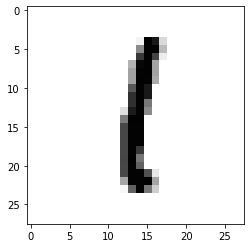

In [41]:
xtest=train.iloc[2100:,1:]
actual = train.iloc[2100:,0]

d=xtest.iloc[1]
d = np.array(d)
d.shape=(28,28)
plt.imshow(255-d, cmap='gray')

In [43]:
clf.predict([xtest.iloc[1]])

array([1])

In [45]:
p=clf.predict(xtest)
count=0
for i in range(0,21000):
    count+=1 if p[i]==actual.iloc[i] else 0
print('accuracy=', (count/21000)*100)

accuracy= 98.26190476190476


(784,)


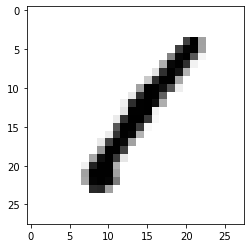

In [53]:
print(xtrain.iloc[0].shape)
test = np.array(xtrain.iloc[0]).reshape(28,28)
plt.imshow(test, cmap = plt.cm.binary)

In [54]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#scale values between 0 and 1, makes it easier for the model to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2651 - accuracy: 0.9219
Epoch 2/3
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1084 - accuracy: 0.9668
Epoch 3/3
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0752 - accuracy: 0.9765


1

In [55]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0947 - accuracy: 0.9700
0.09467142061647028 0.97


In [56]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [57]:
model.save('number_reader.model')
new_model = tf.keras.models.load_model('number_reader.model')

predictions = new_model.predict([x_test])

print(np.argmax(predictions[0]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: number_reader.model/assets


AttributeError: 'list' object has no attribute 'shape'

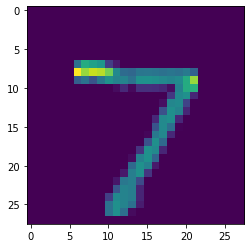

In [58]:
plt.imshow(x_test[0])

### youtube follow along

In [69]:
import tensorflow as tf
#hwat is tensorflow

mnist = tf.keras.datasets.mnist
#what is the datasets module of keras, what is keras

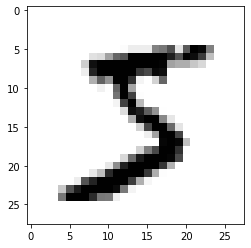

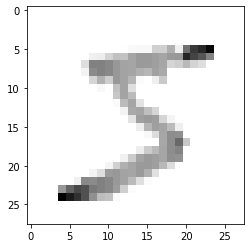

In [79]:
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()
#what does imshow do
#what does load_data() do 

#print(x_train[0])
#a tensor is a multidimensional array

#why do we want to normalize the data?
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [80]:
model = tf.keras.models.Sequential()
#what is the sequential model? 

#input layer
model.add(tf.keras.layers.Flatten())
#need a flat array, not multidimensional (28 by 28) - why?
#what is a layer type?

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#output layer - number of classifications
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#what is the relu function, softmax for probability distribution?
#what are the diff types of layers? dense, flat

#what are the different parameters?
#this is the most complex part of the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#what is the compile part? what does model fit do? what is epochs?
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2647 - accuracy: 0.9221
Epoch 2/3
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1082 - accuracy: 0.9667
Epoch 3/3
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0738 - accuracy: 0.9767


In [81]:
#what does model evaluate do?
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0957 - accuracy: 0.9713
0.09570439273938537 0.9713


In [84]:
x_test.shape

(10000, 28, 28)

In [85]:
#save and load a model
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)

import numpy as np
print(np.argmax(predictions[0]))

INFO:tensorflow:Assets written to: epic_num_reader.model/assets
7


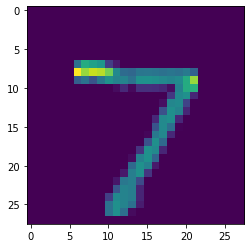

In [86]:
plt.imshow(x_test[0])
plt.show()

In [62]:
tf = tensorflow

NameError: name 'tensorflow' is not defined